Intersection points: P1 = [0.         0.         1.73205081], P2 = [ 0.          0.         -1.73205081]


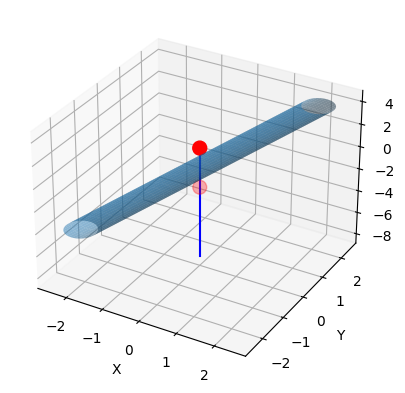

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to find intersection between line and cylinder
def line_cylinder_intersection(P0, d, A, u, r):
    w = P0 - A
    z = np.cross(u, d)
    a = np.dot(z, z)
    b = 2 * np.dot(z, np.cross(u, w))
    c = np.dot(np.cross(u, w), np.cross(u, w)) - r**2
    discriminant = b**2 - 4*a*c
    
    if discriminant < 0:
        return None
    else:
        t1 = (-b + np.sqrt(discriminant)) / (2 * a)
        t2 = (-b - np.sqrt(discriminant)) / (2 * a)
        
        P1 = P0 + t1 * d
        P2 = P0 + t2 * d
        
        return P1, P2

# Parameters for the cylinder
A = np.array([0, 0, 0])  # A point on the axis of the cylinder
u = np.array([0.5, 0.5, 1])  # Unit vector along the axis of the cylinder
u = u / np.linalg.norm(u)  # Normalize u
r = 1  # Radius of the cylinder

# Parameters for the line
P0 = np.array([0, 0, -3])  # A point on the line
d = np.array([0, 0, 1])  # Direction vector of the line

# Find intersection points
intersection_points = line_cylinder_intersection(P0, d, A, u, r)
if intersection_points is not None:
    P1, P2 = intersection_points
    print(f"Intersection points: P1 = {P1}, P2 = {P2}")

# Create plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot line
t_line = np.linspace(-5, 5, 100)
line_points = P0 + np.outer(t_line, d)
ax.plot(line_points[:, 0], line_points[:, 1], line_points[:, 2], 'b')

# Plot cylinder
phi = np.linspace(0, 2 * np.pi, 30)
z_cylinder = np.linspace(-5, 5, 30)
PHI, Z = np.meshgrid(phi, z_cylinder)
X = A[0] + r * np.cos(PHI) * u[0] + Z * u[0]
Y = A[1] + r * np.sin(PHI) * u[1] + Z * u[1]
Z = A[2] + Z * u[2]
ax.plot_surface(X, Y, Z, alpha=0.5)

# Plot intersection points
if intersection_points is not None:
    ax.scatter([P1[0], P2[0]], [P1[1], P2[1]], [P1[2], P2[2]], color='r', s=100)

# Labels
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.show()